In [15]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(anndataR))
suppressMessages(library(ComplexHeatmap))
library(abind)

In [16]:
out_dir <- "../../results/07_marchphages/15_colocalization_with_fib"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [17]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05',
                 'SSc4994', 
                 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

In [18]:
for(sample in sample_list){
    obj_fib <- readRDS(glue::glue("../../results/05_fibroblast/20_cell_state_score/{sample}.rds"))
    obj_mac <- readRDS(glue::glue("../../results/07_marchphages/14_cell_state_score/{sample}.rds"))
    
    df1 <- obj_fib@meta.data %>%
            subset(select = c('Fib1', 'Fib10', 'Fib2', 'Fib3', 'Fib4', 'Fib5', 'Fib6', 'Fib7', 'Fib8', 'Fib9'))

    df2 <- obj_mac@meta.data %>%
            subset(select = c('Antigen-presenting', 'Phagocytic', 'Pro-inflammatory'))
    
    df_cor <- as.data.frame(cor(df2, df1, method="pearson"))
    
    write.csv(df_cor, glue::glue("{out_dir}/{sample}.csv"))
}

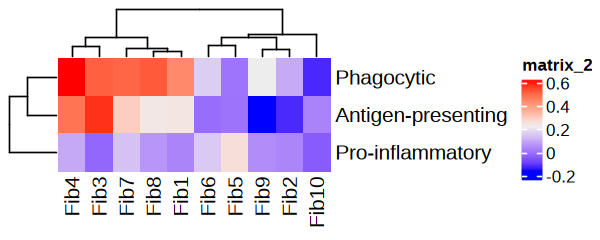

In [19]:
Heatmap(as.matrix(df_cor))

In [10]:
df_cor_list <- lapply(sample_list, function(sample){
    df_cor = read.csv(glue::glue("{out_dir}/{sample}.csv"), row.names = 1)
    return(df_cor)
})

array_3d <- abind(lapply(df_cor_list, function(df) as.matrix(df)), along = 3)
mean_matrix <- apply(array_3d, c(1, 2), mean)

In [20]:
mean_matrix

,Fib1,Fib10,Fib2,Fib3,Fib4,Fib5,Fib6,Fib7,Fib8,Fib9
Antigen-presenting,0.13148608,0.05851810,-0.05738495,0.44708642,0.5276582,0.135481820,0.2043230,0.3685067,0.26557671,-0.02616726
Phagocytic,0.40481015,-0.14926647,0.09448204,0.53094704,0.5278808,-0.006054019,0.2088747,0.3968685,0.45860456,0.22820112
Pro-inflammatory,-0.03885078,0.08645471,-0.05317753,0.03915055,0.1223952,0.255339921,0.1016658,0.1471339,0.05249776,-0.05936921


In [21]:
options(repr.plot.height = 5, repr.plot.width = 6)

ht <- Heatmap(as.matrix(mean_matrix),
              name = 'Correlation',
              rect_gp = gpar(col = "black", lwd = 0.5),
              col = ArchR::paletteContinuous("blueYellow", n = 100),
             cluster_columns = TRUE,
             cluster_rows = TRUE,
             clustering_method_rows = 'ward.D2',
             clustering_method_columns = 'ward.D2'
             )

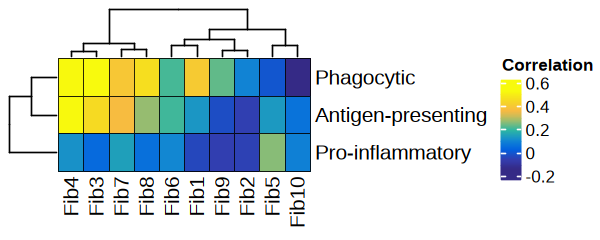

In [22]:
options(repr.plot.height = 2, repr.plot.width = 5)

draw(ht)

In [14]:
write.csv(mean_matrix, glue::glue("{out_dir}/correlation.csv"))